In [0]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
'''


Overview
The data has been split into two groups:

1) training set (train.csv)   891 Rows
2) test set (test.csv)        418 Rows




Contents:
1)Import Necessary Libraries
2)Read In and Explore the Historic Data
3)Data Analysis
4)Data Visualization
5)Cleaning Data
6)Choosing the Best Model
7)Creating Submission File

'''

#1) Import Necessary Libraries
#First off, we need to import several Python libraries such as numpy, pandas,
 # matplotlib and seaborn.

#data analysis libraries
import numpy as np
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 16)
pd.set_option('precision', 2)

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sbn

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#STEP-2) Read in and Explore the Data
#*********************************************
#It's time to read in our training and testing data using pd.read_csv, and take a first look at the training data using the describe() function.

#import train and test CSV files
train = pd.read_csv('train.csv')   #12 columns
test = pd.read_csv('test.csv')

In [0]:
#take a look at the training data

print( train.describe() )

print( "\n"  )

print( train.describe(include="all")  )

print(  "\n"  )

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


        PassengerId  Survived  Pclass                       Name   Sex     Age   SibSp   Parch Ticket    Fare        Cabin Embarked
count        891.00    891.00  891.00                        891   891  714.00  891.00  891.00    891  891.00          204      889
unique          NaN       NaN     NaN                        891     2     NaN     NaN     NaN    681     NaN    

In [0]:
#STEP-3) Data Analysis
#**************************************************
#We're going to consider the features in the
# dataset and how complete they are.

#get a list of the features within the dataset
print(  "\n\n" , train.columns  )

#OUTPUT
#Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
#      dtype='object')



#see a sample of the dataset to get an idea of the variables
print("Train head")
print( train.head(10)  )

print("Train Samples")
print( train.sample(5)  )



 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Train head
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S
4            5         0       3                           Allen, Mr. William Henry   

In [0]:
#Observations from above output
#-----------------------------
#Numerical Features:    Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
#Categorical Features:  Survived, Sex, Embarked, Pclass
#Alphanumeric Features: Name, Ticket, Cabin



print( "Data types for each feature : -"  )
print( train.dtypes  )




#Now that we have an idea of what kinds of features we're working with,
# we can see how much information we have about each of them.

#see a summary of the training dataset
print("Train.describe(include=all)= ")
print( train.describe(include = "all")  )




#Some Observations from above output
#------------------------------------
#1)There are a total of 891 passengers in our training set.

#2)The Age feature is missing approximately 19.8% of its values.
# Hence Age feature is pretty important to survival,
# so we should probably attempt to fill these gaps.

#3)The Cabin feature is missing approximately 77.1% of its values.
# Since so much of the feature is missing, it would be hard to fill in the missing values.
# We'll probably drop these values from our dataset.

#4)The Embarked feature is missing only 2 passeners,
#  which should be relatively harmless.

#check for any other unusable values

print("pd.isnull(train).sum")
print( pd.isnull(train).sum()  )



#We can see that except for the abovementioned missing values,
# no NaN values exist.



#Relationship between Features and Survival
#In this section, we analyze relationship between different features
#  with respect to Survival. We see how different feature values
#  show different survival chance. We also plot different kinds of
# diagrams to visualize our data and findings.

Data types for each feature : -
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Train.describe(include=all)= 
        PassengerId  Survived  Pclass                       Name   Sex     Age   SibSp   Parch Ticket    Fare        Cabin Embarked
count        891.00    891.00  891.00                        891   891  714.00  891.00  891.00    891  891.00          204      889
unique          NaN       NaN     NaN                        891     2     NaN     NaN     NaN    681     NaN          147        3
top             NaN       NaN     NaN  Slemen, Mr. Richard James  male     NaN     NaN     NaN   1601     NaN  C23 C25 C27        S
freq            NaN       NaN     NaN                          1   577     NaN     NaN     NaN      7     NaN           

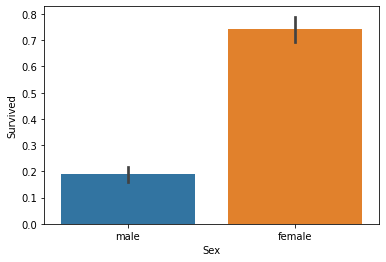

 percentages of females vs. males that survive
Percentage of females who survived: 74.20382165605095


In [0]:
#4) Data Visualization
#*************************************
#It's time to visualize our data so we can estimate few predictions

#-----------------
#4.A) Sex Feature
#-----------------
#draw a bar plot of survival by sex
sbn.barplot(x="Sex", y="Survived", data=train)
plt.show()
print(" percentages of females vs. males that survive")
print( "Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100  )

In [0]:



print( "train------------------\n\n"  )
print( train  )



print("---------train[Survived]---------\n\n"  )
print( train["Survived"]  )

print( "------------------\n\n"  )
print( train["Sex"] == 'female'  )




print( "train[Survived][  train[Sex] == 'female' ] **********\n\n"  )
print( train["Survived"][  train["Sex"] == 'female' ]  )




print( "train[Survived][train[Sex] == 'female'].value_counts()*****************\n\n"  )
print(train["Survived"][train["Sex"] == 'female'].value_counts() )





print( "train[Survived][train[Sex] == 'female'].value_counts(normalize = True)====================================\n\n"  )
print( train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)  )





print( "train[Survived][train[Sex] == 'female'].value_counts(normalize = True)[1]====================================\n\n"  )
print( train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]  )




print( "Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100  )
print( "Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100  )



#Percentage of females who survived: 74.2038216561
#Percentage of males who survived: 18.8908145581

#Some Observations from above output
#------------------------------------
# As predicted, females have a much higher chance of survival than males.
# The Sex feature is essential in our predictions.

train------------------


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.05   NaN        S
..           ...       ...     ...                

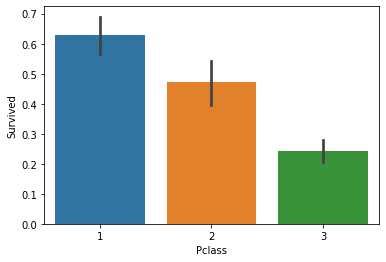

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847

Percentage of Pclass = 1 who survived:

 1    136
0     80
Name: Survived, dtype: int64

Percentage of Pclass = 1 who survived:

 1    0.63
0    0.37
Name: Survived, dtype: float64

Percentage of Pclass = 1 who survived:

 0.6296296296296297


In [0]:
#--------------------
#4.B) Pclass Feature
#--------------------
#draw a bar plot of survival by Pclass
sbn.barplot(x="Pclass", y="Survived", data=train)
plt.show()


#print( percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)
#Percentage of Pclass = 1 who survived: 62.962962963
#Percentage of Pclass = 2 who survived: 47.2826086957
#Percentage of Pclass = 3 who survived: 24.2362525458

print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts()  )

print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)    )

print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]     )





#Some Observations from above output
#------------------------------------
#As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)



Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


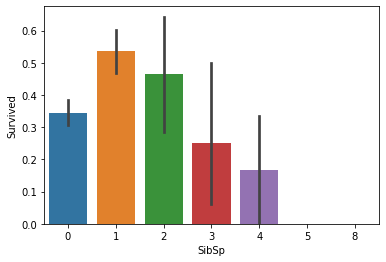

In [0]:
#----------------------
#4.C) SibSp Feature
#----------------------
#draw a bar plot for SibSp vs. survival
sbn.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:",
      train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:",
      train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:",
      train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
#OUTPUT:-
#Percentage of SibSp = 0 who survived: 34.5394736842
#Percentage of SibSp = 1 who survived: 53.5885167464
#Percentage of SibSp = 2 who survived: 46.4285714286

plt.show()







#Some Observations from above output
#------------------------------------
#In general, its clear that people with more siblings or
# spouses aboard were less likely to survive.
# However, contrary to expectations, people with no siblings
#  or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)


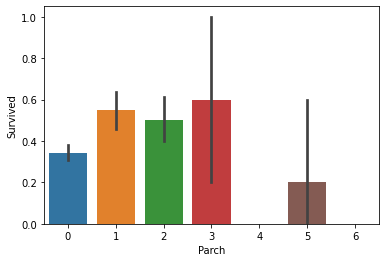

In [0]:
#--------------------
#4.D)Parch Feature
#--------------------

#draw a bar plot for Parch vs. survival
sbn.barplot(x="Parch", y="Survived", data=train)
plt.show()




#Some Observations from above output
#------------------------------------
#People with less than four parents or children aboard are more likely to survive than those with four or more.
# Again, people traveling alone are less likely to survive than those with 1-3 parents or children.


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked     AgeGroup
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S      Student
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C        Adult
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S  Young Adult
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S  Young Adult
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.05   NaN        S  Young Adul

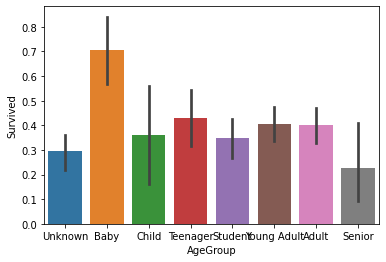

In [0]:
#-----------------
#4.E)Age Feature
#-----------------


#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

bins =   [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
print( train  )
#draw a bar plot of Age vs. survival
sbn.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#Done********************************************************






#Some Observations from above output
#------------------------------------
#Babies are more likely to survive than any other age group.


###################################


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked     AgeGroup  CabinBool
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S      Student          0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C        Adult          1
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S  Young Adult          0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S  Young Adult          1
4              5         0       3                           Allen, Mr. 

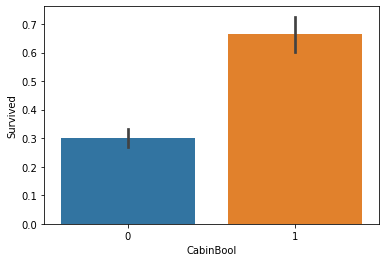

In [0]:
#--------------------
#4.F) Cabin Feature
#--------------------

#I think the idea here is that people with recorded cabin numbers are of higher socioeconomic class,
#  and thus more likely to survive.

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

print( "###################################\n\n"  )
print( train  )



#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:",
      train["Survived"][train["CabinBool"] == 1].value_counts(
                                     normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:",
      train["Survived"][train["CabinBool"] == 0].value_counts(
                                     normalize = True)[1]*100)

#draw a bar plot of CabinBool vs. survival
sbn.barplot(x="CabinBool", y="Survived", data=train)
plt.show()


#OUTPUT :-
#Percentage of CabinBool = 1 who survived: 66.6666666667
#Percentage of CabinBool = 0 who survived: 29.9854439592

#Some Observations from above output
#------------------------------------
#People with a recorded Cabin number are, in fact,
#more likely to survive. (66.6% vs 29.9%)

In [0]:
#5) Cleaning Data
#*********************************

#Time to clean our data to account for missing values and unnecessary information!

#Looking at the Test Data
#Let's see how our test data looks!

print( test.describe(include="all")  )


#Some Observations from above output for test.csv data
#----------------------------------------------------
#1) We have a total of 418 passengers.
#2) 1 value from the Fare feature is missing.
#3) Around 20.5% of the Age feature is missing in training file
#   we will need to fill that in.



        PassengerId  Pclass                                            Name   Sex     Age   SibSp   Parch    Ticket    Fare            Cabin Embarked     AgeGroup  CabinBool
count        418.00  418.00                                             418   418  418.00  418.00  418.00       418  417.00               91      418          418     418.00
unique          NaN     NaN                                             418     2     NaN     NaN     NaN       363     NaN               76        3            8        NaN
top             NaN     NaN  Smith, Mrs. Lucien Philip (Mary Eloise Hughes)  male     NaN     NaN     NaN  PC 17608     NaN  B57 B59 B63 B66        S  Young Adult        NaN
freq            NaN     NaN                                               1   266     NaN     NaN     NaN         5     NaN                3      270           96        NaN
mean        1100.50    2.27                                             NaN   NaN   23.94    0.45    0.39       NaN   35.63       

In [0]:
#Cabin Feature
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop( ['Cabin'], axis = 1)

#Ticket Feature
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [0]:
#Embarked Feature
#now we need to fill in the missing values in the Embarked feature
print( "Number of people embarking in Southampton (S):" ,  )


print( "\n\nSHAPE = " , train[train["Embarked"] == "S"].shape  )
print( "SHAPE[0] = " , train[train["Embarked"] == "S"].shape[0]  )






southampton = train[train["Embarked"] == "S"].shape[0]
print( southampton  )


print( "Number of people embarking in Cherbourg (C):" ,  )
cherbourg = train[train["Embarked"] == "C"].shape[0]
print( cherbourg  )

print( "Number of people embarking in Queenstown (Q):" ,  )
queenstown = train[train["Embarked"] == "Q"].shape[0]
print( queenstown  )



#It's clear that the majority of people embarked in Southampton (S).
# Let's go ahead and fill in the missing values with S.

#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})


Number of people embarking in Southampton (S):


SHAPE =  (644, 12)
SHAPE[0] =  644
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [0]:
#Age Feature
#Next we'll fill in the missing values in the Age feature.
# Since a higher percentage of values are missing,
# it would be illogical to fill all of them with the same value (as we did with Embarked).
# Instead, let's try to find a way to predict the missing ages.

#create a combined group of both datasets
combine = [train, test]
print( combine[0]  )


#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(', ([A-Za-z]+)\.', expand=False)



print( "\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n"  )
print( train  )
print()


print( pd.crosstab(train['Title'], train['Sex'] )    )





# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(
       ['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'],
        'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print( "\n\nAfter grouping rare title : \n" , train  )


print( train[['Title', 'Survived']].groupby(['Title'],
                                    as_index=True).count()  )





print( "\nMap each of the title groups to a numerical value."  )
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)





print( "\n\nAfter replacing title with neumeric values.\n"  )
print( train  )



#NOTICE the values of last newly added column 'Title'



     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch   Fare Embarked     AgeGroup  CabinBool
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   7.25        S      Student          0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  71.28        C        Adult          1
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   7.92        S  Young Adult          0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0  53.10        S  Young Adult          1
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0   8.05        S  Young Adult          0
..           ...       ...     ...                                          

In [0]:
#Next, we'll try to predict the missing Age values from the most common age for their Title.

# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Mr.= Young Adult
print( "mode() of mr_age : ", mr_age    )

print( "\n\n"  )

miss_age = train[train["Title"] == 2]["AgeGroup"].mode()  #Miss.= Student
print( "mode() of miss_age : ", miss_age  )
print( "\n\n"  )

mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Mrs.= Adult
print( "mode() of mrs_age : ", mrs_age  )
print( "\n\n"  )

master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
print( "mode() of master_age : ", master_age  )
print( "\n\n"  )

royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult
print( "mode() of royal_age : ", royal_age  )
print( "\n\n"  )

rare_age = train[train["Title"] == 6]["AgeGroup"].mode()  # Adult
print( "mode() of rare_age : ", rare_age  )



print( "\n\n**************************************************\n\n"  )
print( train.describe(include="all")  )
print( train  )




print( "\n\n********   train[AgeGroup][0] :  \n\n"  )

for x in range(10) :
    print( train["AgeGroup"][x]  )


age_title_mapping = {1: "Young Adult", 2: "Student",
                3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":   # x=5 ( means for 6th record )
        train["AgeGroup"][x] = age_title_mapping[  train["Title"][x]  ]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]






print( "\n\nAfter replacing Unknown values from AgeGroup column : \n"  )
print( train  )



#Now that we've filled in the missing values at least somewhat accurately,
# it is time to map each age group to a numerical value.





# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5,
               'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
print()
print( train  )


# dropping the Age feature for now, might change
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

print( "\n\nAge column droped."  )
print( train  )


mode() of mr_age :  0    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]



mode() of miss_age :  0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]



mode() of mrs_age :  0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]



mode() of master_age :  0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]



mode() of royal_age :  0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]



mode() of rare_age :  0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult 

In [0]:
#Name Feature
#We can drop the name feature now that we've extracted the titles.

#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)


#Sex Feature
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

print( train  )






#Embarked Feature
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
print()
print( train.head()  )





#Fare Feature
#It is time separate the fare values into some logical groups as well as
# filling in the single missing value in the test dataset.

#fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[ train["Pclass"] == pclass ]["Fare"].mean(), 2)


#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4,
                            labels = [1, 2, 3, 4])

test['FareBand'] = pd.qcut(test['Fare'], 4,
                           labels = [1, 2, 3, 4])



#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
#check train data
print( "\n\nFare column droped\n"  )
print( train  )




#check test data
print()
print( test.head()  )



     PassengerId  Survived  Pclass  Sex  SibSp  Parch   Fare Embarked  AgeGroup  CabinBool  Title
0              1         0       3    0      1      0   7.25        S       4.0          0    1.0
1              2         1       1    1      1      0  71.28        C       6.0          1    3.0
2              3         1       3    1      0      0   7.92        S       5.0          0    2.0
3              4         1       1    1      1      0  53.10        S       5.0          1    3.0
4              5         0       3    0      0      0   8.05        S       5.0          0    1.0
..           ...       ...     ...  ...    ...    ...    ...      ...       ...        ...    ...
886          887         0       2    0      0      0  13.00        S       5.0          0    6.0
887          888         1       1    1      0      0  30.00        S       4.0          1    2.0
888          889         0       3    1      1      2  23.45        S       4.0          0    2.0
889          890    

In [0]:
#****************************************
#6) Choosing the Best Model
#****************************************

#Splitting the Training Data
#We will use part of our training data (20% in this case) to test the accuracy of our different models.

from sklearn.model_selection import train_test_split

input_predictors = train.drop(['Survived', 'PassengerId'], axis=1)
ouptut_target = train["Survived"]


x_train, x_val, y_train, y_val=train_test_split(
    input_predictors, ouptut_target, test_size = 0.20, random_state = 7)

#Testing Different Models
#I will be testing the following models with my training data (got the list from here):

#1) Logistic Regression
#2) Gaussian Naive Bayes
#3) Support Vector Machines
#4) Linear SVC
#5) Perceptron
#6) Decision Tree Classifier
#7) Random Forest Classifier
#8) KNN or k-Nearest Neighbors
#9) Stochastic Gradient Descent
#10) Gradient Boosting Classifier




#For each model, we set the model, fit it with 80% of our training data,
# predict for 20% of the training data and check the accuracy.

from sklearn.metrics import accuracy_score

In [0]:
#MODEL-1) LogisticRegression
#------------------------------------------
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-1: Accuracy of LogisticRegression : ", acc_logreg  )



#OUTPUT:-
#MODEL-1: Accuracy of LogisticRegression :  77.09





MODEL-1: Accuracy of LogisticRegression :  77.09


In [0]:
#MODEL-2) Gaussian Naive Bayes
#------------------------------------------
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-2: Accuracy of GaussianNB : ", acc_gaussian  )

#OUTPUT:-
#MODEL-2: Accuracy of GaussianNB : 78.68




MODEL-2: Accuracy of GaussianNB :  77.09


In [0]:
#MODEL-3) Support Vector Machines
#------------------------------------------
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-3: Accuracy of Support Vector Machines : ", acc_svc  )

#OUTPUT:-
#MODEL-3: Accuracy of Support Vector Machines :  82.74

MODEL-3: Accuracy of Support Vector Machines :  75.98


In [0]:
#MODEL-4) Linear SVC
#------------------------------------------
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-4: Accuracy of LinearSVC : ",acc_linear_svc  )

#OUTPUT:-
#MODEL-4: Accuracy of LinearSVC :  78.68



MODEL-4: Accuracy of LinearSVC :  76.54


In [0]:
#MODEL-5) Perceptron
#------------------------------------------
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-5: Accuracy of Perceptron : ",acc_perceptron  )

#OUTPUT:-
#MODEL-5: Accuracy of Perceptron :  79.19


MODEL-5: Accuracy of Perceptron :  74.86


In [0]:
#MODEL-6) Decision Tree Classifier
#------------------------------------------
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-6: Accuracy of DecisionTreeClassifier : ", acc_decisiontree  )

#OUTPUT:-
#MODEL-6: Accuracy of DecisionTreeClassifier :  81.22




MODEL-6: Accuracy of DecisionTreeClassifier :  72.63


In [0]:


#MODEL-7) Random Forest
#------------------------------------------
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-7: Accuracy of RandomForestClassifier : ",acc_randomforest  )

#OUTPUT:-
#MODEL-7: Accuracy of RandomForestClassifier :  83.25





MODEL-7: Accuracy of RandomForestClassifier :  78.21


In [0]:
#MODEL-8) KNN or k-Nearest Neighbors
#------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-8: Accuracy of k-Nearest Neighbors : ",acc_knn  )

#OUTPUT:-
#MODEL-8: Accuracy of k-Nearest Neighbors :  77.66

MODEL-8: Accuracy of k-Nearest Neighbors :  75.42


In [0]:

#MODEL-9) Stochastic Gradient Descent
#------------------------------------------
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-9: Accuracy of Stochastic Gradient Descent : ",acc_sgd )

#OUTPUT:-
#MODEL-9: Accuracy of Stochastic Gradient Descent :  71.07


MODEL-9: Accuracy of Stochastic Gradient Descent :  78.21


In [0]:
#MODEL-10) Gradient Boosting Classifier
#------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-10: Accuracy of GradientBoostingClassifier : ",acc_gbk )

#OUTPUT:-
#MODEL-10: Accuracy of Stochastic Gradient Descent :  84.77



MODEL-10: Accuracy of GradientBoostingClassifier :  81.01


In [0]:

#Let's compare the accuracies of each model!

models = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian Naive Bayes','Support Vector Machines',
              'Linear SVC', 'Perceptron',  'Decision Tree',
              'Random Forest', 'KNN','Stochastic Gradient Descent',
              'Gradient Boosting Classifier'],
    'Score': [acc_logreg, acc_gaussian, acc_svc,
              acc_linear_svc, acc_perceptron,  acc_decisiontree,
              acc_randomforest,  acc_knn,  acc_sgd, acc_gbk]
                    })


print()
print( models.sort_values(by='Score', ascending=False) )




#According to above reporting, I decided to use the Random Forest model for the testing data.



                          Model  Score
9  Gradient Boosting Classifier  81.01
6                 Random Forest  78.21
8   Stochastic Gradient Descent  78.21
0           Logistic Regression  77.09
1          Gaussian Naive Bayes  77.09
3                    Linear SVC  76.54
2       Support Vector Machines  75.98
7                           KNN  75.42
4                    Perceptron  74.86
5                 Decision Tree  72.63


In [0]:
#7) Creating Submission Result File
#***********************************

#It is time to create a submission.csv file which includes our predictions for test data

#set ids as PassengerId and predict survival
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

print( "All survival predictions done." )
print( "All predictions exported to submission.csv file." )

print( output )


All survival predictions done.
All predictions exported to submission.csv file.
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [2]:
print(python --version)


NameError: ignored